In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from acnh import get_sample_trends, plot_trends

In [2]:
sns.set_style('white')

In [5]:
data = pd.read_csv('data/generated_data.csv')
buy_data = data.iloc[:, 0:4]
sell_data = data.drop(columns=['base_price'])

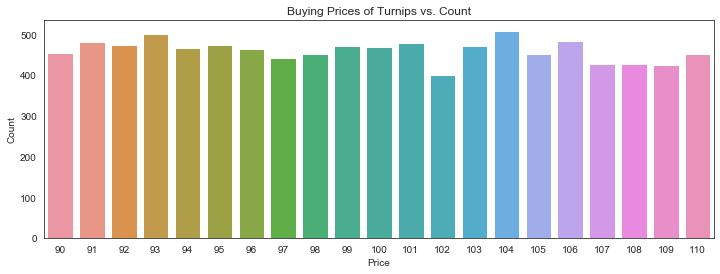

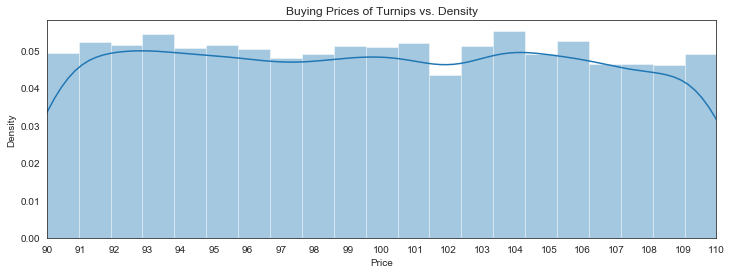

count    9668.000000
mean       99.868329
std         6.035098
min        90.000000
25%        95.000000
50%       100.000000
75%       105.000000
max       110.000000
Name: base_price, dtype: float64

In [6]:
buying_prices = buy_data['base_price']

plt.figure(figsize=(12, 4))
buying_price_countplot = sns.countplot(buying_prices)
buying_price_countplot.set(
    title='Buying Prices of Turnips vs. Count',
    xlabel='Price',
    ylabel='Count'
)
plt.show()

plt.figure(figsize=(12, 4))
buying_price_distplot = sns.distplot(buying_prices, bins=21)
buying_price_distplot.set(
    title='Buying Prices of Turnips vs. Density',
    xlabel='Price',
    ylabel='Density'
)
plt.xlim((90, 110))
plt.xticks(range(90, 111))
plt.show()

buying_prices.describe()

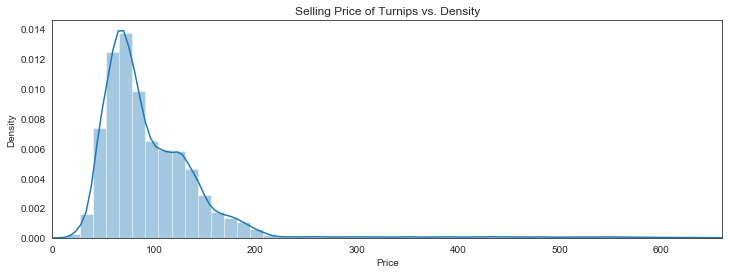

count    116016.000000
mean         97.670632
std          60.833684
min          14.000000
25%          63.000000
50%          82.000000
75%         118.000000
max         660.000000
dtype: float64

In [7]:
selling_prices = sell_data.iloc[:, 3:].unstack()

plt.figure(figsize=(12, 4))
selling_price_distplot = sns.distplot(selling_prices)
selling_price_distplot.set(
    title='Selling Price of Turnips vs. Density',
    xlabel='Price',
    ylabel='Density'
)
plt.xlim((0, 660))
plt.show()

selling_prices.describe()

In [8]:
sample_trends = get_sample_trends(sell_data, n_trends=20)
sample_trends = pd.melt(
    sample_trends, 
    id_vars=['seed', 'pattern'], 
    value_vars=sample_trends.columns[3:],
    var_name='time',
    value_name='price'
)

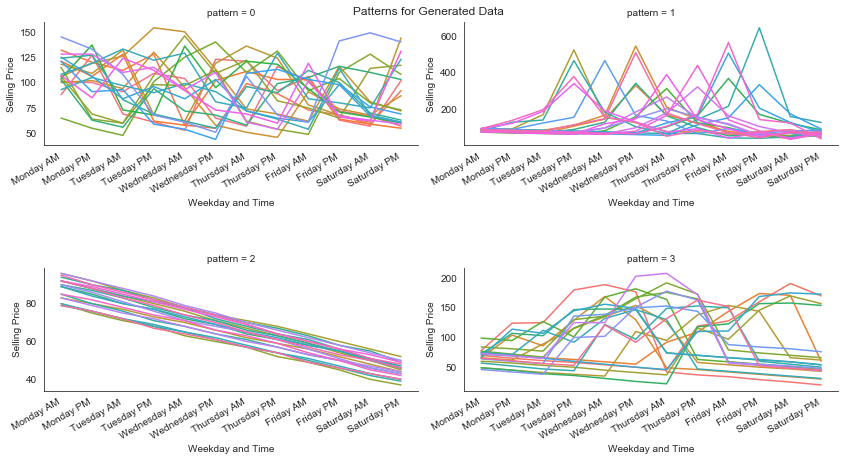

In [9]:
plot_trends(
    data=sample_trends,
    subset_column='pattern',
    hue='seed',
    title='Patterns for Generated Data'
)